<a href="https://colab.research.google.com/github/GaborVxxx/ml_notes/blob/main/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, SimpleRNN, Dense, Flatten
from tensorflow.keras.optimizers import Adam, SGD

In [74]:
# Things you should automatically know and have memorized
# N = number of samples
# T = sequence length
# D = number of input features
# M = number of hidden units
# K = number of output units

In [75]:
# Make some data
N = 1
T = 10
D = 3
K = 2
X = np.random.randn(N, T, D)
print(X)

[[[-0.51403187  1.38285569  0.6584072 ]
  [-0.21581289  1.11862737  1.11647611]
  [-1.12976771 -0.39138862  0.93641275]
  [-0.7360695   1.55590345 -0.2700487 ]
  [ 0.26474116  0.62007143 -0.47022524]
  [-0.06010877  0.57831672 -1.7348388 ]
  [-0.84571118 -2.11345496 -0.42424712]
  [ 1.3888081   0.85567266  1.54206227]
  [ 0.58490085  0.56075592  0.54039516]
  [-0.82926071  0.19818279 -0.9040848 ]]]


[[-0.51403187  1.38285569  0.6584072 ]
 [-0.21581289  1.11862737  1.11647611]
 [-1.12976771 -0.39138862  0.93641275]
 [-0.7360695   1.55590345 -0.2700487 ]
 [ 0.26474116  0.62007143 -0.47022524]
 [-0.06010877  0.57831672 -1.7348388 ]
 [-0.84571118 -2.11345496 -0.42424712]
 [ 1.3888081   0.85567266  1.54206227]
 [ 0.58490085  0.56075592  0.54039516]
 [-0.82926071  0.19818279 -0.9040848 ]]


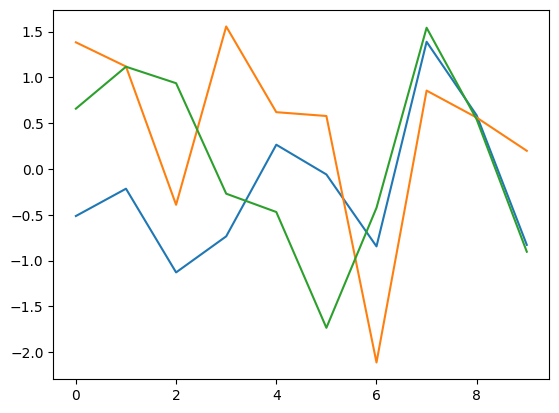

In [76]:
# visualize
plt.plot(X[0,:])
print(X[0,:])
plt.show()

In [77]:
# Make a model
M = 5 # number of hidden units
i = Input(shape=(T, D))
x = SimpleRNN(M)(i)
x = Dense(K)(x)

model = Model(i, x)

In [78]:
# get the output, this is random... as no traing is done
Yhat = model.predict(X)
print(Yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
[[-0.506174    0.92225647]]


In [79]:
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 10, 3)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_2 (SimpleRNN)             │ (None, 5)                   │              45 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 57 (228.00 B)

 Trainable params: 57 (228.00 B)

 Non-trainable params: 0 (0.00 B)

In [80]:
# chack the weights
model.layers[1].get_weights() # this is the RNN layer!

[array([[-0.438704  ,  0.04064655,  0.16168708,  0.32431704, -0.06303668],
        [-0.27226102, -0.7959423 ,  0.16323727, -0.11697721,  0.8080484 ],
        [ 0.49781913,  0.30512005, -0.5125247 ,  0.64150876, -0.18684125]],
       dtype=float32),
 array([[-0.33519197,  0.09799166,  0.9012515 , -0.16754971, -0.19420816],
        [ 0.5343623 ,  0.61042535,  0.25122362,  0.02825633,  0.52718693],
        [-0.47183335,  0.7752953 , -0.3056443 ,  0.07534356, -0.2778404 ],
        [-0.0869469 ,  0.03630747, -0.17614745, -0.96286106,  0.18163855],
        [ 0.60984975,  0.12400559,  0.01364133, -0.19583285, -0.7577396 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0.], dtype=float32)]

In [81]:
# check the shape
a, b, c = model.layers[1].get_weights()
print(a.shape, b.shape, c.shape)

(3, 5) (5, 5) (5,)


In [82]:
for layer in model.layers:
    #print(type(layer.get_weights()))
    if layer.get_weights() == []:
        print(f"{layer.name}: No weights")
    elif len(layer.get_weights()) == 1:
        print(f"{layer.name}: layer.get_weights().shape")
    elif len(layer.get_weights()) == 2:
        x, y = layer.get_weights()
        print(f"{layer.name}: {x.shape}, {y.shape}")
    else:
        x, y, z = layer.get_weights()
        print(f"{layer.name}: {x.shape}, {y.shape}, {z.shape}")


input_layer_2: No weights
simple_rnn_2: (3, 5), (5, 5), (5,)
dense_2: (5, 2), (2,)


In [83]:
Wx, Wh, bh = model.layers[1].get_weights()
Wo, bo = model.layers[2].get_weights()

In [94]:
# how the calculation go in this model...

h_last = np.zeros(M) # initial hidden state
#print(h_last)
x = X[0]
#print(x)
Yhats = []

for t in range(T):
    s1 = x[t].dot(Wx)
    print(x[t], Wx)
    print(f"s1 : {s1}")
    s2 = h_last.dot(Wh)
    print(f"s2 : {s2}")
    s3 = s1 + s2
    print(f"s3 : {s3}")
    s4 = s3 + bh
    print(f"s4 : {s4}")
    h = np.tanh(s4)
    print(f"h : {h}")
    y = h.dot(Wo) + bo
    print(f"y : {y}")

    h = np.tanh(x[t].dot(Wx) + h_last.dot(Wh) + bh)
    #print(h)
    y = h.dot(Wo) + bo
    Yhats.append(y)

    h_last = h
print(Yhats[-1])

[-0.51403187  1.38285569  0.6584072 ] [[-0.438704    0.04064655  0.16168708  0.32431704 -0.06303668]
 [-0.27226102 -0.7959423   0.16323727 -0.11697721  0.8080484 ]
 [ 0.49781913  0.30512005 -0.5125247   0.64150876 -0.18684125]]
s1 : [ 0.17677784 -0.92067374 -0.19482869  0.09390208  1.02679961]
s2 : [0. 0. 0. 0. 0.]
s3 : [ 0.17677784 -0.92067374 -0.19482869  0.09390208  1.02679961]
s4 : [ 0.17677784 -0.92067374 -0.19482869  0.09390208  1.02679961]
h : [ 0.17495911 -0.72621599 -0.19240043  0.09362705  0.77262159]
y : [-0.39790935  1.02783159]
[-0.21581289  1.11862737  1.11647611] [[-0.438704    0.04064655  0.16168708  0.32431704 -0.06303668]
 [-0.27226102 -0.7959423   0.16323727 -0.11697721  0.8080484 ]
 [ 0.49781913  0.30512005 -0.5125247   0.64150876 -0.18684125]]
s1 : [ 0.34592251 -0.55847565 -0.42451408  0.5153835   0.70890542]
s2 : [ 0.1071161  -0.47611452  0.02809306 -0.30578521 -0.93181314]
s3 : [ 0.45303861 -1.03459016 -0.39642103  0.20959828 -0.22290772]
s4 : [ 0.45303861 -1.034